## Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../data/auto-mpg.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
df['horsepower'].unique()
df['horsepower']=df['horsepower'].map(lambda x: np.nan if x == '?' else int(x))
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [12]:
df['weight_kg'] = df['weight'] / 2.2

<AxesSubplot:>

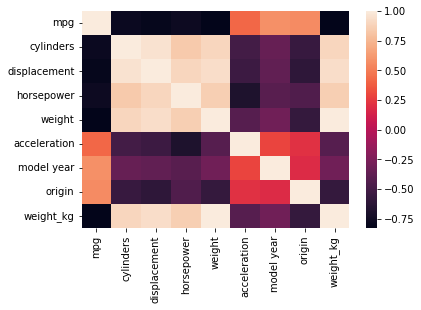

In [13]:
sns.heatmap(df.corr())

In [14]:
X, y = df.drop(['car name','mpg'],axis=1), df['mpg']
X.shape, y.shape

((398, 8), (398,))

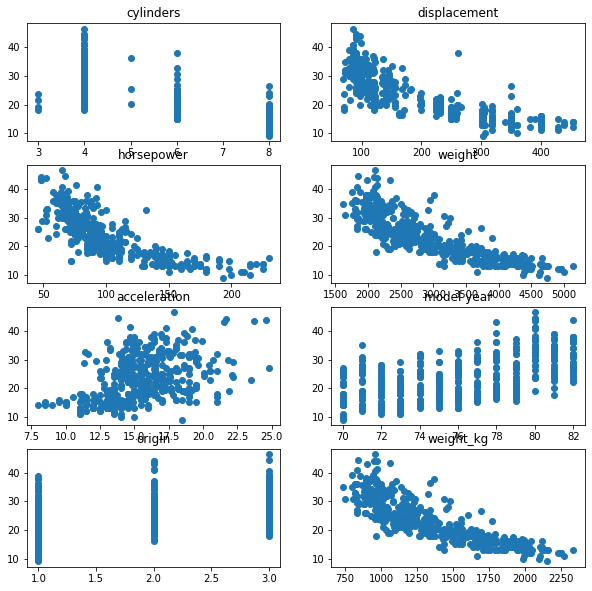

In [15]:
plt.figure(figsize=(10,10))
for i, col in enumerate(X.columns):
    plt.subplot(4, 2, i+1)
    plt.scatter(X[col], y)
    plt.title(col);

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

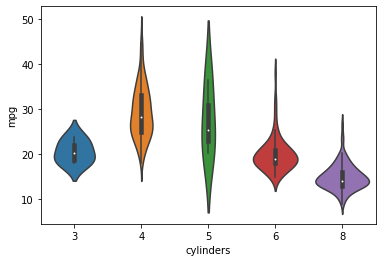

In [16]:
sns.violinplot(x=df['cylinders'], y=y)

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=10)
linreg = LinearRegression()
lasso = Lasso(random_state=10)
ridge = Ridge(random_state=10)
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
linreg.fit(X_train_scaled,y_train)
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test_scaled)))

3.169258374235076

<AxesSubplot:>

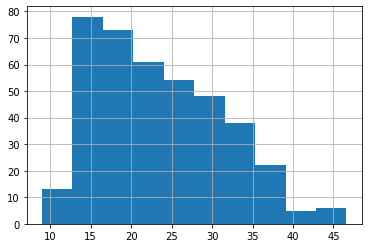

In [26]:
y.hist()

In [30]:
pd.DataFrame(linreg.coef_,X.columns,columns=['coef']).sort_values(by='coef',ascending=False)

,coef
model year,2.715303
displacement,2.413164
origin,1.233003
acceleration,0.387342
horsepower,-0.660651
cylinders,-0.898498
weight,-2.902039
weight_kg,-2.902039


In [34]:
def display_coefs(X,y,model):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=10)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled,y_train)
    print('Score: %s' % np.sqrt(mean_squared_error(y_test, model.predict(X_test_scaled))))
    print(pd.DataFrame(model.coef_,X.columns,columns=['coef']).sort_values(by='coef',ascending=False))

In [35]:
display_coefs(X,y,linreg)

Score: 3.169258374235076
                  coef
model year    2.715303
displacement  2.413164
origin        1.233003
acceleration  0.387342
horsepower   -0.660651
cylinders    -0.898498
weight       -2.902039
weight_kg    -2.902039


In [38]:
display_coefs(X,y,Lasso(random_state=10, alpha=0.1))

Score: 3.1603935864731167
                  coef
model year    2.591645
origin        0.944192
acceleration  0.205538
cylinders    -0.000000
displacement  0.000000
weight_kg    -0.000000
horsepower   -0.215358
weight       -4.913558


In [44]:
display_coefs(X,y,Ridge(random_state=10, alpha=3))

Score: 3.162334854061064
                  coef
model year    2.659638
displacement  1.679498
origin        1.176357
acceleration  0.321690
horsepower   -0.633856
cylinders    -0.648260
weight_kg    -2.706274
weight       -2.706274


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

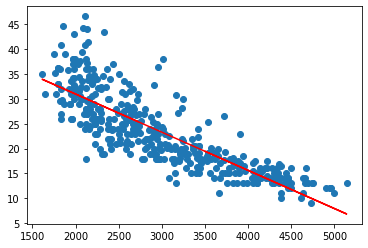

4.333698159150957


In [128]:
X_feature = X['weight'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_feature, y)
y_pred = model.predict(X_feature)

plt.scatter(X_feature, y)
plt.plot(X_feature, y_pred, color='r')
plt.show()

print(np.sqrt(mean_squared_error(y,y_pred)))

4.1688973107398


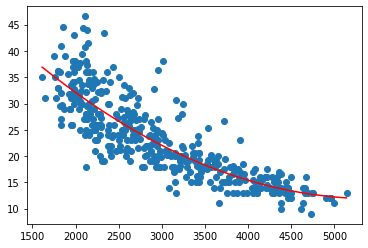

In [133]:
X_feature = X['weight'].values.reshape(-1, 1)

polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_feature)
poly_model = LinearRegression()
poly_model.fit(X_poly,y)
y_poly_pred = poly_model.predict(X_poly)

print(np.sqrt(mean_squared_error(y,y_poly_pred)))

plt.scatter(X_feature, y)
sorted_zip = sorted(zip(X_feature,y_poly_pred))
X_feature,y_poly_pred = zip(*sorted_zip)
plt.plot(X_feature, y_poly_pred, color='r')
plt.show()


In [141]:
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.transform(X_test)

lasso.fit(X_poly_train, y_train)
y_poly_pred = lasso.predict(X_poly_test)
print(np.sqrt(mean_squared_error(y_test,y_poly_pred)))

2.799094413578181


C:\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1058.435806556582, tolerance: 1.7310718417266184
  model = cd_fast.enet_coordinate_descent(


[Линейные модели на Хабре](https://habr.com/ru/company/ods/blog/323890/)

[Видео с визуализацией использования Ridge и Lasso](https://www.youtube.com/watch?v=Xm2C_gTAl8c)

🛠 Построить модели регресии для банковского датасета, сравнить rmse.

In [145]:
df = pd.read_csv('../data/bank.csv')
y=df['EstimatedSalary']
df.head()
# Ваш код здесь

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
